<a href="https://colab.research.google.com/github/perpendicooler/An-different-approach-to-solve-addition-modulo-in-group-theory/blob/main/Random_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RF Mean Squared Error: 0.7899761449013245
RF R-squared: 0.8227579606224817


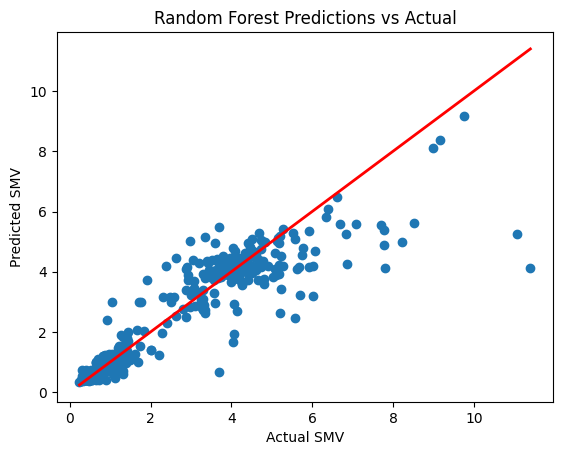

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 13.0940 - val_loss: 6.2194
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2111 - val_loss: 3.4202
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6480 - val_loss: 2.7205
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3035 - val_loss: 2.4416
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8740 - val_loss: 2.1228
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4176 - val_loss: 1.9916
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4373 - val_loss: 1.9103
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2480 - val_loss: 1.8561
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1764 - val_loss: 1.7869
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1722 - val_loss: 1.7708
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1238 - val_loss: 1.7303
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0913 - val_

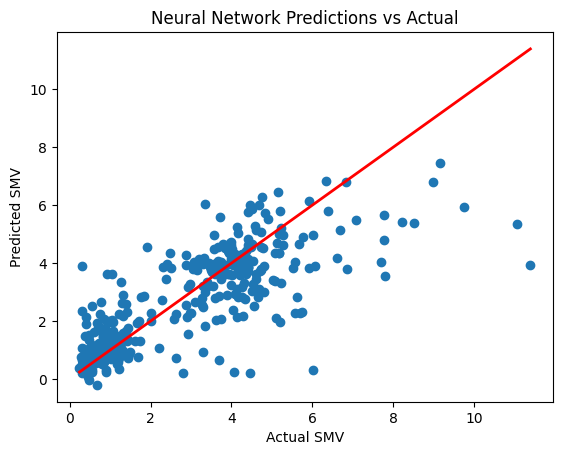

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_excel('/content/SMV-12&7GG.xlsx')

# Data preprocessing
data.replace('-', np.nan, inplace=True)
data.fillna(0, inplace=True)
data_encoded = pd.get_dummies(data, columns=['Operation', 'Operation Position', 'Operation Description', 'Yarn Type', 'Knit Construction','GG'])
data['MC Speed'] = pd.to_numeric(data['MC Speed'], errors='coerce')
data = data.fillna(0)

# Define features and target
X = data_encoded.drop('SMV', axis=1)
y = data_encoded['SMV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, 'trained_rf_model.pkl')

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("RF Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("RF R-squared:", r2_score(y_test, y_pred_rf))

# Plotting predictions vs actual
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual SMV')
plt.ylabel('Predicted SMV')
plt.title('Random Forest Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.legend(loc="upper left")

plt.show()

# Neural Network implementation
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_history = nn_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Make predictions with the neural network
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the Neural Network model
print("NN Mean Squared Error:", mean_squared_error(y_test, y_pred_nn))
print("NN R-squared:", r2_score(y_test, y_pred_nn))

# Plotting predictions vs actual for Neural Network
plt.scatter(y_test, y_pred_nn)
plt.xlabel('Actual SMV')
plt.ylabel('Predicted SMV')
plt.title('Neural Network Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.legend(loc="upper left")
plt.show()




In [ ]:
!pip install xgboost
from xgboost import XGBRegressor


XGBoost Mean Squared Error: 0.7224377507919746
XGBoost R-squared: 0.8379111304814513


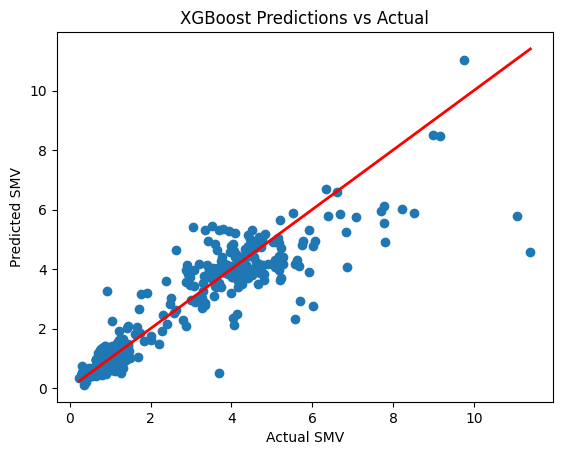

In [ ]:
# XGBoost model training
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model
joblib.dump(xgb_model, 'trained_xgb_model.pkl')

# Predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R-squared:", r2_score(y_test, y_pred_xgb))

# Plotting predictions vs actual for XGBoost
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual SMV')
plt.ylabel('Predicted SMV')
plt.title('XGBoost Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()


In [ ]:
# Define a parameter grid for XGBoost tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=2)
xgb_grid.fit(X_train, y_train)

# Get the best parameters and model
best_xgb_model = xgb_grid.best_estimator_

# Save the best XGBoost model
joblib.dump(best_xgb_model, 'best_trained_xgb_model.pkl')

# Predictions with the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model
print("Best XGBoost Mean Squared Error:", mean_squared_error(y_test, y_pred_best_xgb))
print("Best XGBoost R-squared:", r2_score(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6

XGBoost Mean Squared Error: 0.7224377507919746
XGBoost R-squared: 0.8379111304814513
XGBoost Adjusted R-squared: -1.5350699192701018


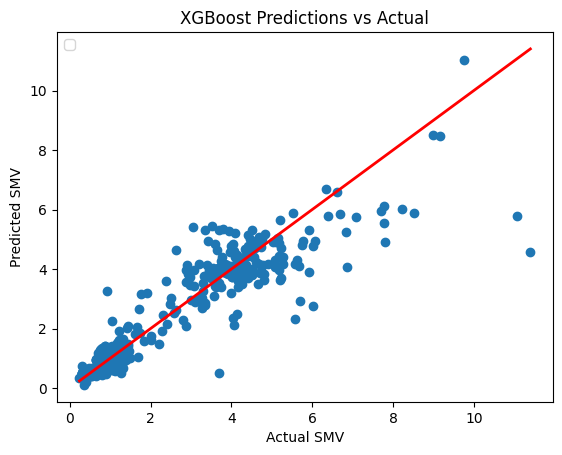

In [ ]:
from xgboost import XGBRegressor

# Function to calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model
joblib.dump(xgb_model, 'trained_xgb_model.pkl')

# Predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
r2_xgb = r2_score(y_test, y_pred_xgb)
n = X_test.shape[0]  # Number of data points
p = X_test.shape[1]  # Number of features

adj_r2_xgb = adjusted_r2(r2_xgb, n, p)

print("XGBoost Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R-squared:", r2_xgb)
print("XGBoost Adjusted R-squared:", adj_r2_xgb)

# Plotting predictions vs actual for XGBoost
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual SMV')
plt.ylabel('Predicted SMV')
plt.title('XGBoost Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.legend(loc="upper left")
plt.show()
